# TF Slim - finetuning

## Finetune Inception V1 on flowers

In [1]:
HOME = %pwd if HOME is None else HOME
SLIM = HOME + '/models/research/slim'
TMP = HOME + '/tmp'
DATA = HOME + '/data'
AVA=DATA + '/ava'
TID=DATA + '/tid'


In [2]:
%cd $SLIM
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import tensorflow as tf
import time

from datasets import dataset_utils

# Main slim library
from tensorflow.contrib import slim

/snappi.ai/tensorflow/nima/models/research/slim


In [3]:
import tensorflow as tf
from datasets import dataset_utils, convert_nima_tid, convert_nima_ava
# convert_nima_tid.run(TID)
convert_nima_ava.run(AVA)

>> count found filenames=10, original target rows=255530, validation rows=1
>> Converting image 1/9 shard 0
>> Converting image 2/9 shard 0=<class 'list'>, ratings=[1, 3, 3, 3, 10, 10, 13, 20, 8, 15], mean=7.104651
>> Converting image 3/9 shard 1=<class 'list'>, ratings=[9, 13, 14, 11, 11, 7, 9, 2, 7, 3], mean=4.534884
>> Converting image 4/9 shard 1=<class 'list'>, ratings=[7, 7, 8, 14, 22, 11, 8, 6, 2, 0], mean=4.694118
>> Converting image 5/9 shard 2=<class 'list'>, ratings=[11, 9, 7, 16, 6, 10, 10, 8, 5, 3], mean=4.858824
>> Converting image 6/9 shard 2=<class 'list'>, ratings=[0, 3, 11, 8, 22, 15, 8, 11, 6, 2], mean=5.686047
>> Converting image 7/9 shard 3=<class 'list'>, ratings=[0, 1, 2, 0, 8, 5, 10, 22, 18, 23], mean=8.044944
>> Converting image 8/9 shard 3=<class 'list'>, ratings=[3, 3, 10, 13, 10, 14, 10, 11, 8, 7], mean=5.898876
>> Converting image 9/9 shard 4=<class 'list'>, ratings=[6, 11, 16, 22, 13, 6, 9, 4, 0, 1], mean=4.204545
   >  imageId=77, type(ratings)=<class 'li

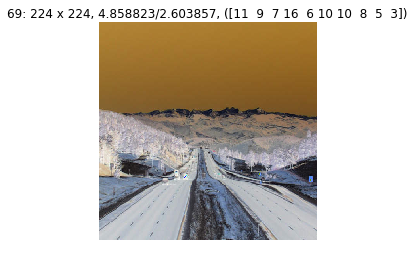

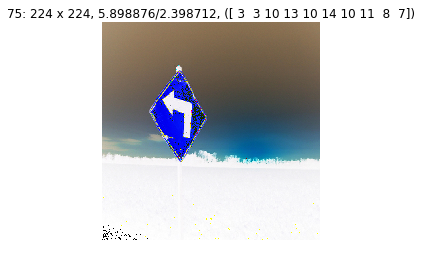

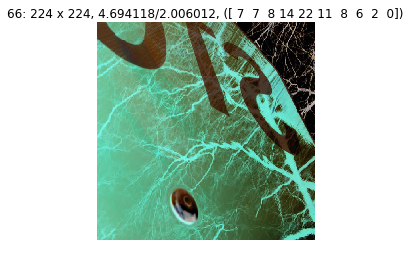

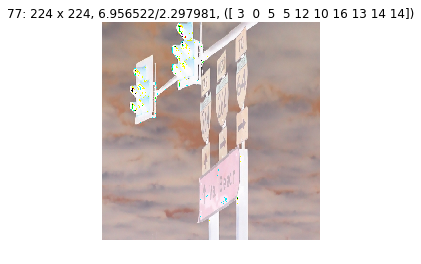

In [7]:
from datasets import nima_tid, nima_ava
import tensorflow as tf
from preprocessing import preprocessing_factory
import preprocessing.nima_preprocessing as nima_pre
from tensorflow.contrib import slim

import sys

nima_preprocessing = preprocessing_factory.get_preprocessing('nima', is_training=True)

with tf.Graph().as_default(): 
    dataset_name = "AVA"
    if dataset_name == "AVA":
        dataset = nima_ava.get_split('train', AVA)
        data_provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset, common_queue_capacity=32, common_queue_min=1)
        image, id, ratings, mean, stddev = data_provider.get(['image', 'id', 'ratings', 'mean', 'stddev'])

    elif dataset_name == "TID":
        dataset = nima_tid.get_split('train', TID, file_pattern='nima_tid_%s_*.tfrecord')
        data_provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset, common_queue_capacity=32, common_queue_min=1)
        image, id, mean, stddev = data_provider.get(['image', 'id', 'mean', 'stddev'])
#     else:
#         break
    
    
    # apply preprocessing
    image = nima_preprocessing(image, 224,224, resize_side_min=255, resize_side_max=255)
#     image = nima_pre.preprocess_image(image, 224,224, is_training=True, resize_side_min=255, resize_side_max=255)

        
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(4):
                np_image, np_id, np_mean, np_stddev, np_ratings = sess.run([image, id, mean, stddev, ratings])
                height, width, _ = np_image.shape
                
                plt.figure()
                plt.imshow(np_image)
                plt.title('%s: %d x %d, %f/%f, (%s)' % (np_id.decode("utf-8"), height, width, np_mean, np_stddev, np_ratings))
                plt.axis('off')
                plt.show()

In [ ]:
pwd
